## - 불러올 패키지 목록

In [1]:
# 파이썬 기본 패키지
import math  # 수학 함수 패키지
import itertools  # Functions creating iterators for efficient looping

# 데이터 핸들링을 위한 패키지
import numpy as np
import pandas as pd

# statsmodels 패키지
from statsmodels.api import *
from statsmodels.formula.api import *
from statsmodels.stats.api import *
from statsmodels.stats.proportion import *
from statsmodels.stats.diagnostic import *
from statsmodels.stats.weightstats import *
from statsmodels.stats.outliers_influence import *  # 다중공선성 확인 관련 패키지
from statsmodels.multivariate.pca import PCA as pca  # 대문자로 사용할 경우 sklearn 의 PCA와 겹침

# 시계열 관련 statsmodels 패키지
from statsmodels.tsa.api import *
from statsmodels.tsa.ar_model import *
from statsmodels.tsa.arima.model import *
from statsmodels.tsa.arima_process import *
from statsmodels.tsa.statespace import *
from statsmodels.graphics.api import *
from statsmodels.graphics.tsaplots import *

# SciPy 패키지
import scipy as sp
import scipy.stats as stats  # 통계 분석을 위한 패키지
from scipy.cluster.hierarchy import *  # 계층적 군집 분석을 위한 패키지

# pingouin 패키지
import pingouin as pg

# scikit-learn 패키지
from sklearn.preprocessing import *  # 데이터 전처리를 위한 패키지
from sklearn.feature_selection import *  # 알고리즘에 큰 영향을 미치는 feature를 우선순위대로 선택하는 기능 제공
from sklearn.model_selection import *  # 데이터 분리, 검증 및 파라미터 튜닝을 위한 패키지
from sklearn.metrics import *  # 모델에 대한 다양한 성능 평가를 위한 패키지
from sklearn.linear_model import *    # 선형 회귀 분석을 위한 패키지 (로지스틱 회귀 포함)
from sklearn.cluster import *  # 비지도 군집화 알고리즘 제공
from sklearn.tree import *  # 의사결정나무 알고리즘 제공
from sklearn.ensemble import *  # 앙상블 알고리즘 제공
from sklearn.neighbors import *  # kNN 알고리즘 제공
from sklearn.svm import *  # 서포트 벡터 머신 알고리즘 제공
from sklearn.mixture import *  # 혼합분포군집(GMM 등) 알고리즘 제공
from sklearn.decomposition import *  # 차원축소 알고리즘 제공
from sklearn.multiclass import OneVsRestClassifier  # multiclass 분류기 알고리즘 제공

# mlxtend 패키지
from mlxtend.preprocessing import *  # 연관분석에 필요한 트랜잭션 전처리 알고리즘 포함
from mlxtend.frequent_patterns import *  # 연관분석에 사용되는 알고리즘 포함 
from mlxtend.plotting import plot_decision_regions
from mlxtend.feature_selection import SequentialFeatureSelector as SFS  # 변수선택 알고리즘 포함
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

# missingno 패키지 (데이터 전처리 전 결측치 확인)
import missingno as msno

# label별 데이터 카운트를 위한 모듈
from collections import Counter  # https://docs.python.org/3/library/collections.html

# 시각화를 위한 패키지
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.cm as cm  # 내장 colormap, colormap 처리 유틸리티
from matplotlib.colors import ListedColormap  # colors and colormaps
from mlxtend.plotting import plot_decision_regions
%matplotlib inline
# %matplotlib inline 의 목적은 plt.show()함수가 호출되지 않은 경우에도 matplotlib 다이어그램을 렌더링하는 것이다.
# 그러나 현재 업데이트된 버전의 주피터 노트북 버전에서는 %matplotlib inline 를 사용하지 않더라도 Matplotlib 다이어그램을 개체로 표현한다.
# 따라서 굳이 필요하지는 않다. 그러나 코드를 깨끗하게 유지하고 자신이 만든 플롯을 호출하기 위해 여전히 관례적으로 권장된다.

# 경고 메시지 무시
import warnings
warnings.filterwarnings('ignore')

# 그래프 스타일 서식 지정
plt.style.use('default')

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

# 그래프 축의 음수 표현 오류 방지
plt.rcParams['axes.unicode_minus'] = False
#
#

# Dataset 불러오기 및 data 정보 확인

## Dataset 불러오기

In [2]:
# 분석할 데이터 불러오기 / 데이터프레임 생성
df_iris = pd.read_csv(r'C:\Users\Boanerges\GitHub\TIL\rawdata\iris.csv',
                      index_col = 'Unnamed: 0')
df_iris

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,virginica
147,6.3,2.5,5.0,1.9,virginica
148,6.5,3.0,5.2,2.0,virginica
149,6.2,3.4,5.4,2.3,virginica


## Dataset에 대한 정보 및 대략적인 분포 확인

In [3]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [4]:
df_iris.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


(array([41.,  8.,  1.,  7.,  8., 33.,  6., 23.,  9., 14.]),
 array([0.1 , 0.34, 0.58, 0.82, 1.06, 1.3 , 1.54, 1.78, 2.02, 2.26, 2.5 ]),
 <BarContainer object of 10 artists>)

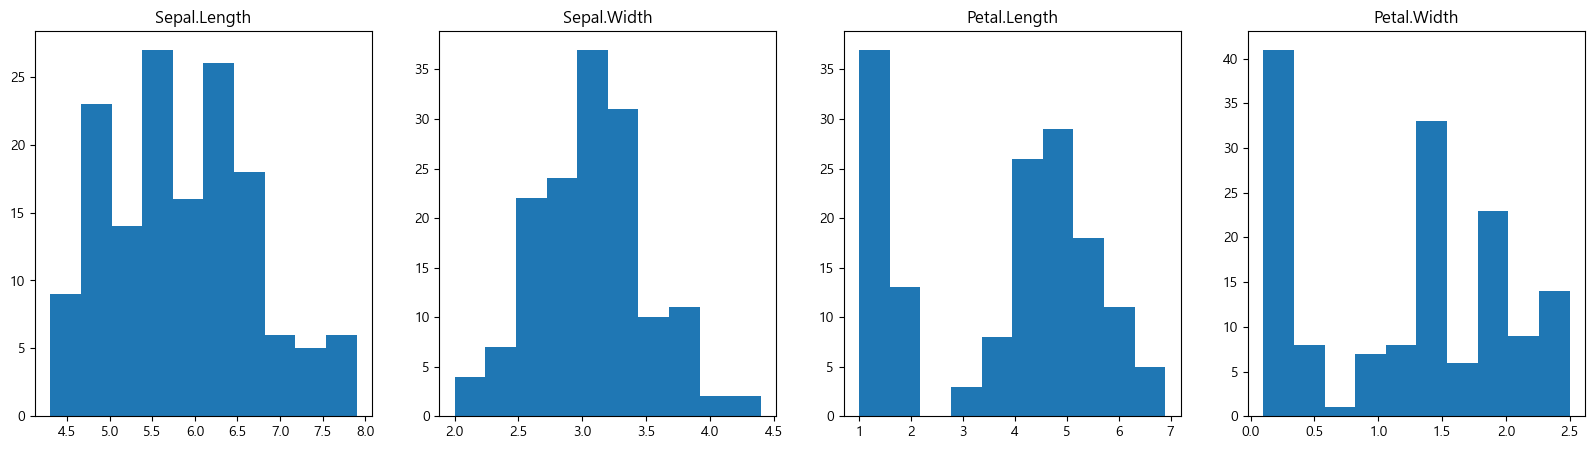

In [5]:
fig, (ax1,ax2,ax3, ax4) = plt.subplots(figsize=(20,5), nrows=1, ncols=4)

ax1.set_title('Sepal.Length')
ax1.hist(df_iris['Sepal.Length'])

ax2.set_title('Sepal.Width')
ax2.hist(df_iris['Sepal.Width'])

ax3.set_title('Petal.Length')
ax3.hist(df_iris['Petal.Length'])

ax4.set_title('Petal.Width')
ax4.hist(df_iris['Petal.Width'])

산점도 행렬
https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot

# 모델 학습에 사용할 x값(예측변수) 설정

In [6]:
x = df_iris.iloc[:, 0:4]
x

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
...,...,...,...,...
146,6.7,3.0,5.2,2.3
147,6.3,2.5,5.0,1.9
148,6.5,3.0,5.2,2.0
149,6.2,3.4,5.4,2.3


In [7]:
y = df_iris.iloc[:, 4]
y

1         setosa
2         setosa
3         setosa
4         setosa
5         setosa
         ...    
146    virginica
147    virginica
148    virginica
149    virginica
150    virginica
Name: Species, Length: 150, dtype: object

# k-means 모델 생성 및 군집화 수행

- `sklearn.cluster.KMeans( n_clusters=8, *, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='deprecated', verbose=0, random_state=None, copy_x=True, n_jobs='deprecated', algorithm='auto' )`  
  - Attributes : `cluster_centers_` : 클러스터 중심의 좌표
  - Attributes : `labels_` : 각 지점의 label
  - Attributes : `inertia_` : sample과 그 sample로부터 가장 가까운 클러스터의 중심까지 거리의 제곱 합. 즉, 오차제곱합. 군집 내의 분산을 의미함. 
  - Attributes : `n_iter_` : 반복 실행 횟수
  - Methods : `.fit()`, `.fit_predict()`, `.predict()`, `.transform()`, `.fit_transform()`  
  https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [8]:
# 일관된 조건으로 군집화 및 평가를 하기 위해 함수로 정의하여 사용

# n_clusters : int, default=8

# init : k-means++ : 수렴 속도를 높이기 위해 스마트 방식으로 k-mean 군집화를 위한 초기 군집 중심을 선택
#        random : n_clusters초기 중심에 대한 데이터에서 무작위로 관측값(행)을 선택

# max_iter: int, default=300. 단일 실행에 대한 k평균 알고리즘의 최대 반복 횟수

def kmeans(k):
    cluster_kmeans = KMeans( n_clusters = k,
                             init = 'random',
                             max_iter = 500,
                             random_state = 0 )
    return cluster_kmeans

## k값 선정
- k-means 모델의 결과 중 하나인 inertia 값 활용
- 군집 수에 따른 집단 내 제곱합을 살펴보고, 그래프 기울기가 크게 감소하는 시점의 k값을 선택

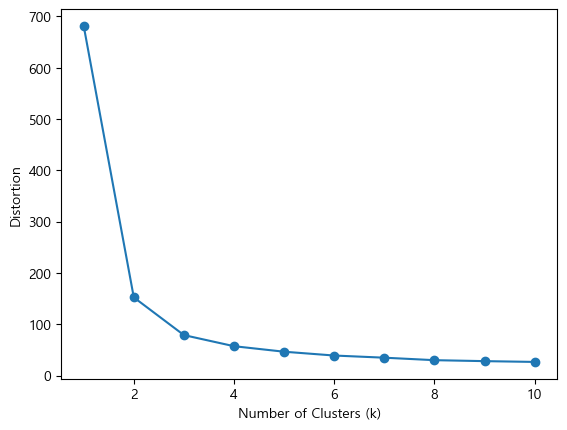

In [9]:
inertia = list()

# k를 1부터 10까지 변화시켜가며 inertia를 측정
for k in range(1,11):
    model_kmeans = kmeans(k).fit(x)
    inertia.append(model_kmeans.inertia_)

# k에 따른 inertia의 변화를 확인하여 그래프가 급격히 변하는 지점으로 k값 선정
plt.plot(range(1,11), inertia, '-o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.show()

## 선정된 k값 모델로 군집화 수행 및 결과 확인

In [10]:
# k를 2개로 설정하고 군집 모델 학습
model_kmeans = kmeans(2)

model_kmeans.fit(x)

# 각각의 클러스터의 중심 확인
print('< centers >')
print(model_kmeans.cluster_centers_)
print()

# 분류된 군집화 값 확인
print('< labels >')
print(model_kmeans.labels_)
print()

print('predict(x)')
print(model_kmeans.predict(x))
print()

print('fit_predict(x)')
print(model_kmeans.fit_predict(x))

< centers >
[[6.30103093 2.88659794 4.95876289 1.69587629]
 [5.00566038 3.36981132 1.56037736 0.29056604]]

< labels >
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]

predict(x)
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]

fit_predict(x)
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0

In [11]:
# 새로운 데이터프레임에 cluster에 대한 컬럼 추가하고 군집화 값 입력
df_result = df_iris.copy()
df_result['km_cluster'] = model_kmeans.labels_
df_result

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,km_cluster
1,5.1,3.5,1.4,0.2,setosa,1
2,4.9,3.0,1.4,0.2,setosa,1
3,4.7,3.2,1.3,0.2,setosa,1
4,4.6,3.1,1.5,0.2,setosa,1
5,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,virginica,0
147,6.3,2.5,5.0,1.9,virginica,0
148,6.5,3.0,5.2,2.0,virginica,0
149,6.2,3.4,5.4,2.3,virginica,0


In [12]:
display( df_result.groupby('Species').count() )

display( df_result.groupby('km_cluster').count() )

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,km_cluster
Species,,,,,
setosa,50,50,50,50,50
versicolor,50,50,50,50,50
virginica,50,50,50,50,50


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
km_cluster,,,,,
0,97,97,97,97,97
1,53,53,53,53,53


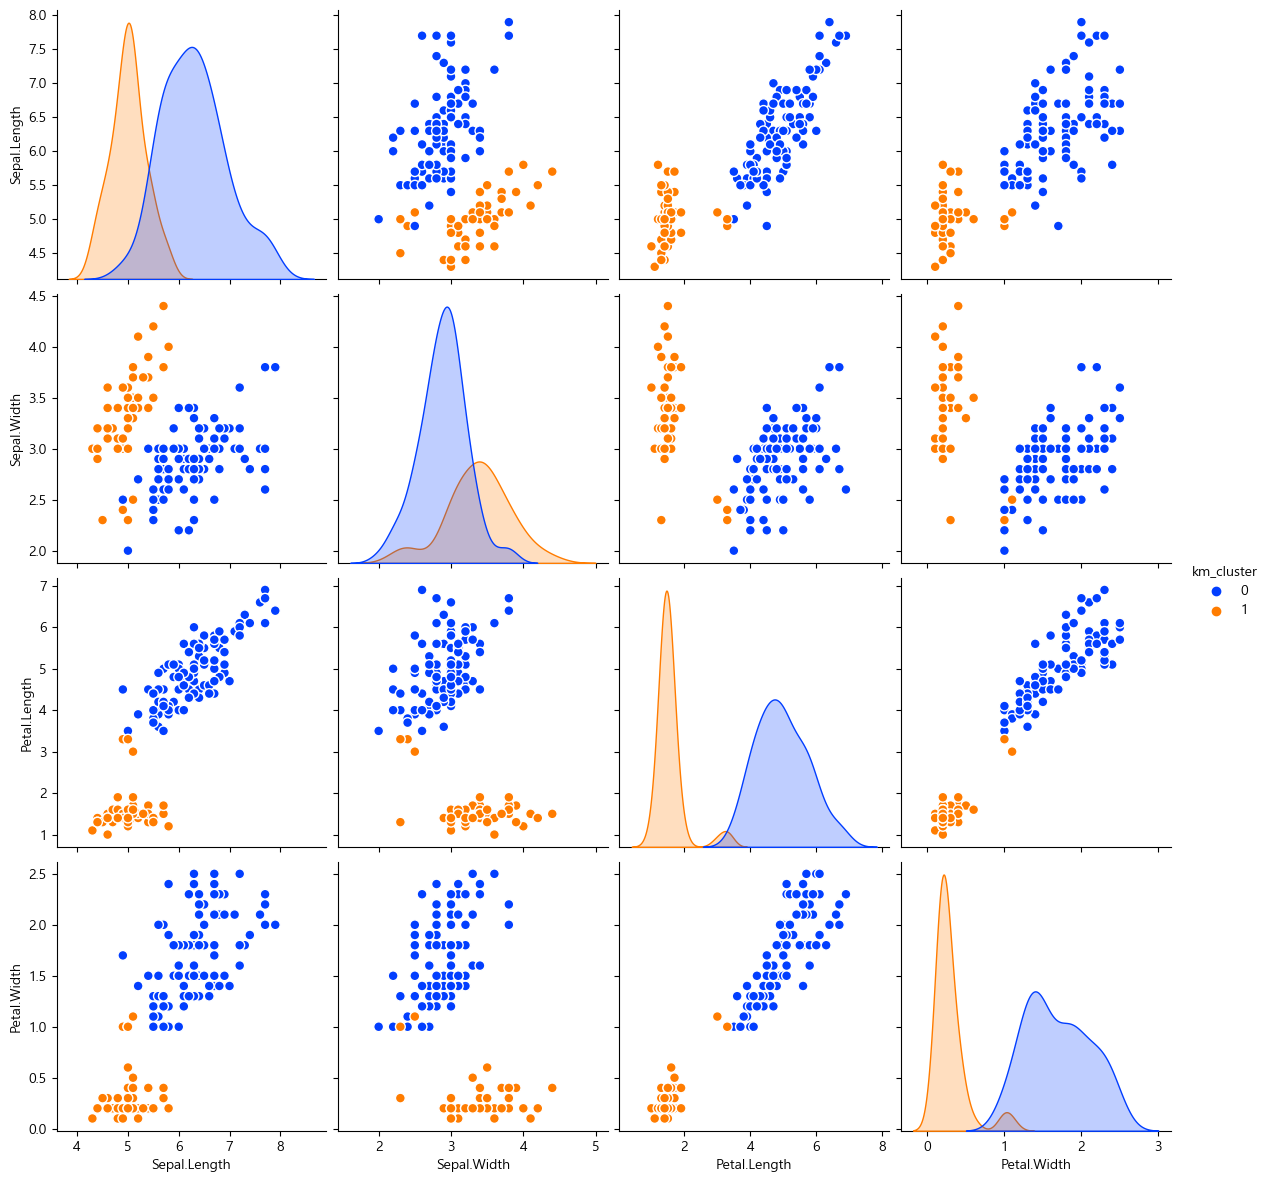

In [13]:
sb.pairplot( df_result,
             hue="km_cluster",
             palette='bright',
             size=3,
             plot_kws=dict(s=50, linewidth=1) )
plt.show()
print()
print()

# 내부 평가 ( Silhouette Coefficient )
- 개별 데이터 각각의 실루엣 계수  
`sklearn.metrics.silhouette_samples( X, labels, *, metric='euclidean', **kwds )`  
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_samples.html

- 전체 데이터의 평균 실루엣 계수  
`sklearn.metrics.silhouette_score( X, labels, *, metric='euclidean', sample_size=None, random_state=None, **kwds )`  
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

$s(i)$ $=$ $b(i)-a(i)\over max( a(i),b(i) )$

## 개별 데이터 각각의 실루엣 계수 산출

In [14]:
# 모든 개별 데이터의 실루엣 계수값을 구함. 
score_samples = silhouette_samples( x, model_kmeans.labels_ )

# df_result에 각 행에 대한 실루엣 계수 컬럼 추가
df_result['silhouette_coeff'] = score_samples

# 컬럼 순서 재조정
df_result = df_result[ ['Species', 'km_cluster', 'silhouette_coeff', 'Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width' ] ]
df_result

,Species,km_cluster,silhouette_coeff,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
1,setosa,1,0.852225,5.1,3.5,1.4,0.2
2,setosa,1,0.826916,4.9,3.0,1.4,0.2
3,setosa,1,0.835426,4.7,3.2,1.3,0.2
4,setosa,1,0.819249,4.6,3.1,1.5,0.2
5,setosa,1,0.848731,5.0,3.6,1.4,0.2
...,...,...,...,...,...,...,...
146,virginica,0,0.724297,6.7,3.0,5.2,2.3
147,virginica,0,0.730283,6.3,2.5,5.0,1.9
148,virginica,0,0.747297,6.5,3.0,5.2,2.0
149,virginica,0,0.702502,6.2,3.4,5.4,2.3


## 군집별 평균 실루엣 계수 산출

In [15]:
# 군집별 평균 실루엣 계수
group_silhouette = df_result.groupby('km_cluster')['silhouette_coeff'].mean()

print('< 군집별 평균 실루엣 계수 >\n', group_silhouette)
print()

< 군집별 평균 실루엣 계수 >
 km_cluster
0    0.632701
1    0.769526
Name: silhouette_coeff, dtype: float64



## 전체 평균 실루엣 계수 산출

In [16]:
# 전체 데이터의 평균 실루엣 계수값을 구함. 
average_score = silhouette_score( x, model_kmeans.labels_ )

print( '전체 평균 실루엣 계수: {0:.4f}'.format(average_score) )
print()

전체 평균 실루엣 계수: 0.6810



## k값에 따른 군집별 실루엣 계수와 평균 실루엣 계수를 비교

< Average_Silhouette_Score by k >

k = 2 :  0.6810461692117464
k = 3 :  0.5528190123564101
k = 4 :  0.4980505049972878
k = 5 :  0.4930804067193526
k = 6 :  0.36483400396700355



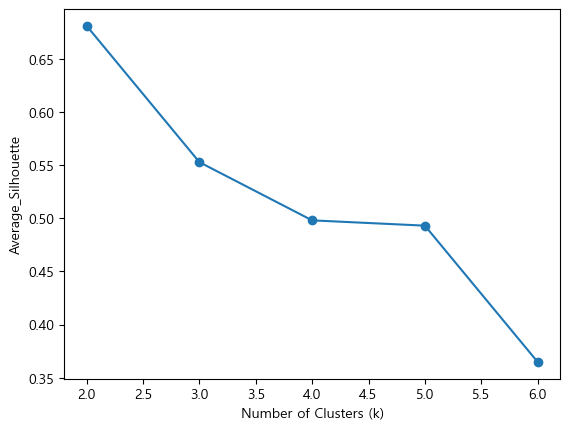

In [17]:
def silhouette_avg_k(a,b):
    avg_silhouette = list()
    print('< Average_Silhouette_Score by k >')
    print()
    
    i = 0
    for i in range(a,b):
        model_kmeans = kmeans(i).fit(x)
        
        average_score = silhouette_score( x, model_kmeans.labels_ )
        print( 'k =',i,': ', average_score )
        
        avg_silhouette.append(average_score)
    
    print()
    plt.plot(range(a,b), avg_silhouette, '-o')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Average_Silhouette')
    plt.show()

    
# k를 2부터 6까지 변화시켜가며 평균 실루엣 계수를 측정
silhouette_avg_k(2,7)
print()

In [18]:
def silhouette_avg_vs_group(a,b):
    print('< Average_Silhouette_Score >')
    print()
    
    i = 0
    for i in range(a,b):
        model_kmeans = kmeans(i).fit(x)
        
        score_samples = silhouette_samples( x, model_kmeans.labels_ )
        average_score = silhouette_score( x, model_kmeans.labels_ )
        
        df = pd.DataFrame( { 'group' : model_kmeans.labels_,
                             'Coeff' : score_samples,
                             'Avg' : average_score } )
        df['Coeff-avg'] = df['Coeff'] - df['Avg']
        
        display( df.groupby(['Avg','group'])[ ['Coeff','Coeff-avg'] ].mean() )
        

# 군집별 실루엣 계수와 평균 실루엣 계수를 비교        
silhouette_avg_vs_group(2,7)
print()

< Average_Silhouette_Score >



Coeff  Coeff-avg
Avg      group                     
0.681046 0      0.632701  -0.048345
         1      0.769526   0.088480

Coeff  Coeff-avg
Avg      group                     
0.552819 0      0.798140   0.245321
         1      0.417320  -0.135499
         2      0.451105  -0.101714

Coeff  Coeff-avg
Avg      group                     
0.498051 0      0.763176   0.265125
         1      0.362998  -0.135052
         2      0.321324  -0.176727
         3      0.419518  -0.078532

Coeff  Coeff-avg
Avg     group                     
0.49308 0      0.398519  -0.094561
        1      0.405827  -0.087254
        2      0.342779  -0.150301
        3      0.299765  -0.193315
        4      0.763176   0.270095

Coeff  Coeff-avg
Avg      group                     
0.364834 0      0.415810   0.050976
         1      0.359125  -0.005709
         2      0.277012  -0.087822
         3      0.417512   0.052678
         4      0.424343   0.059509
         5      0.342779  -0.022055

## 클러스터별 평균 실루엣 계수의 시각화
- [참고] https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

In [19]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성

def visualize_silhouette_kmeans(cluster_lists, X_features): 

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

In [20]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 클러스터링 결과를 시각화 
def visualize_kmeans_multi_PCA(cluster_lists, X_features):
    
    from sklearn.cluster import KMeans
    from sklearn.decomposition import PCA
    import pandas as pd
    import numpy as np
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 입력 데이터의 FEATURE가 여러개일 경우 2차원 데이터 시각화가 어려우므로 PCA 변환하여 2차원 시각화
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(X_features)
    dataframe = pd.DataFrame(pca_transformed, columns=['PCA1','PCA2'])
    
     # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 KMeans 클러스터링 수행하고 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링으로 클러스터링 결과를 dataframe에 저장. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(pca_transformed)
        dataframe['cluster']=cluster_labels
        
        unique_labels = np.unique(clusterer.labels_)
        markers=['o', 's', '^', 'x', '*']
       
        # 클러스터링 결과값 별로 scatter plot 으로 시각화
        for label in unique_labels:
            label_df = dataframe[dataframe['cluster']==label]
            if label == -1:
                cluster_legend = 'Noise'
            else :
                cluster_legend = 'Cluster '+str(label)           
            axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
                        edgecolor='k', marker=markers[label], label=cluster_legend)

        axs[ind].set_title('Number of Cluster : '+ str(n_cluster))    
        axs[ind].legend(loc='upper right')
    
    plt.show()

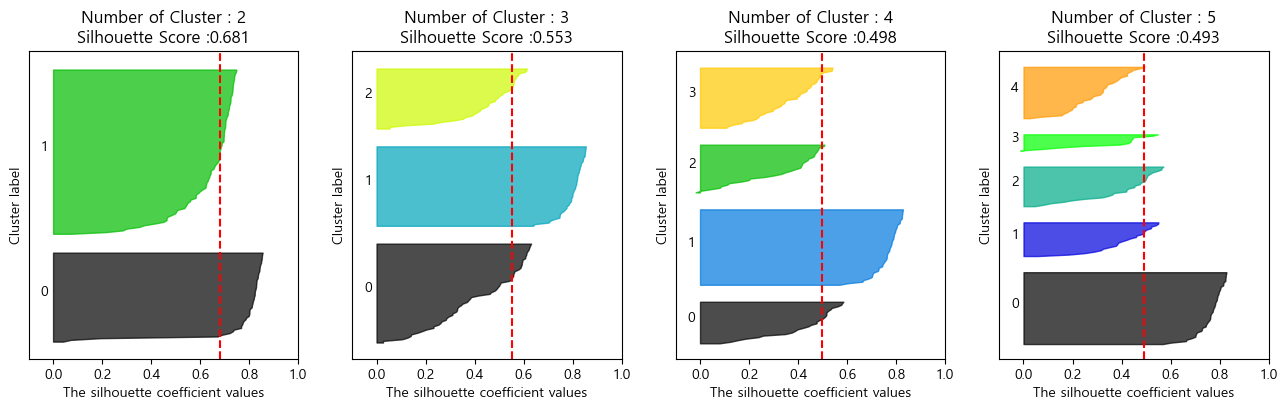

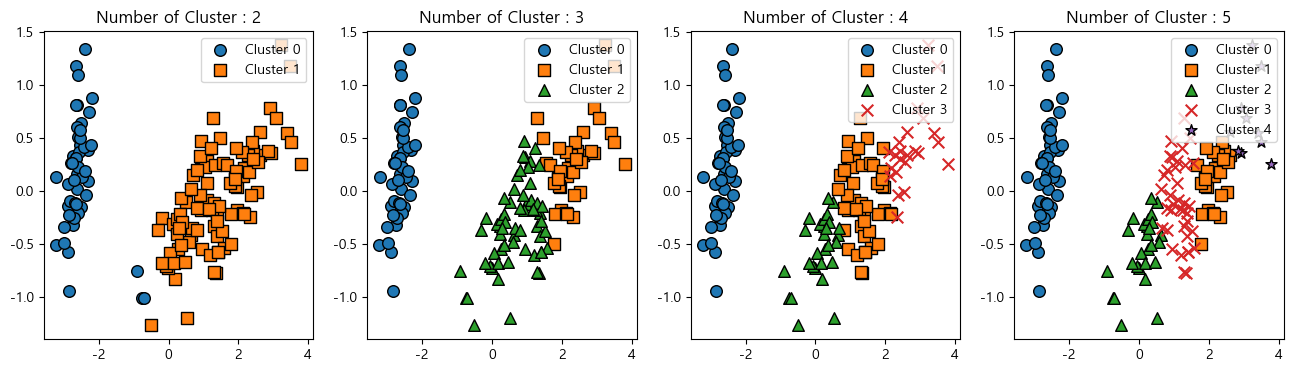

In [21]:
# cluster 개수를 2개, 3개, 4개, 5개 일때의 클러스터별 실루엣 계수 평균값을 시각화 
visualize_silhouette_kmeans( list(range(2,6)), x)
visualize_kmeans_multi_PCA( list(range(2,6)), x)
print()

# 외부 평가 (실제 data의 Label과 비교)

## 실제 label과 모델이 그룹핑한 label 비교

In [22]:
df_result.groupby( ['Species', 'km_cluster'] ).count()

silhouette_coeff  Sepal.Length  Sepal.Width  \
Species    km_cluster                                                
setosa     1                         50            50           50   
versicolor 0                         47            47           47   
           1                          3             3            3   
virginica  0                         50            50           50   

                       Petal.Length  Petal.Width  
Species    km_cluster                             
setosa     1                     50           50  
versicolor 0                     47           47  
           1                      3            3  
virginica  0                     50           50